# Survey Text Preferences: Exploring Tone Patterns

In [2]:
import pandas as pd
import re

In [37]:
df = pd.read_excel('initial dataset.xlsx')
df.head(2)

,Unnamed: 0,id,age,gender,ethnicity,race,education,marital_status,income,employment,...,sample_4,sample_4_text,sample_5,sample_5_text,sample_6,sample_6_text,sample_7,sample_7_text,sample_8,sample_8_text
0,0,1,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,...,Persuasive,A few weeks ago at the Rosa Parks Pop-Up Pantr...,Original,Making mindful choices about our food is absol...,Original,"Join us in observing Ramadan, an esteemed trad...",Persuasive,Cultural competenceis the ability to effective...,Original,Understanding Latino Hunger Facts With Compass...
1,1,2,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,...,Simplier,"About 60,000 CUNY undergraduates or 25 percent...",Simplier,"In the midst of these turbulent times, countle...",Original,"The 'Generation Harvest' team, who are dedicat...",Original,"Certainly, the battle against food insecurity ...",Persuasive,"Last Friday, there was a parade in East Harlem..."


In [38]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'ethnicity', 'race', 'education',
       'marital_status', 'income', 'employment', 'language', 'disability',
       'states', 'start_time', 'end_time', 'id.1', 'sample_options_id',
       'sample_1', 'sample_1_text', 'sample_2', 'sample_2_text', 'sample_3',
       'sample_3_text', 'sample_4', 'sample_4_text', 'sample_5',
       'sample_5_text', 'sample_6', 'sample_6_text', 'sample_7',
       'sample_7_text', 'sample_8', 'sample_8_text'],
      dtype='object')

In [39]:
df.shape

(15, 33)

In [40]:
print(df.columns)
print(df.shape)
print('na value count', df.isna().sum().sum())

Index(['Unnamed: 0', 'id', 'age', 'gender', 'ethnicity', 'race', 'education',
       'marital_status', 'income', 'employment', 'language', 'disability',
       'states', 'start_time', 'end_time', 'id.1', 'sample_options_id',
       'sample_1', 'sample_1_text', 'sample_2', 'sample_2_text', 'sample_3',
       'sample_3_text', 'sample_4', 'sample_4_text', 'sample_5',
       'sample_5_text', 'sample_6', 'sample_6_text', 'sample_7',
       'sample_7_text', 'sample_8', 'sample_8_text'],
      dtype='object')
(15, 33)
na value count 2


In [41]:
# Check for NaN values in the entire DataFrame
print(df.isna().sum())
print(df.dtypes)

Unnamed: 0           0
id                   0
age                  0
gender               0
ethnicity            0
race                 2
education            0
marital_status       0
income               0
employment           0
language             0
disability           0
states               0
start_time           0
end_time             0
id.1                 0
sample_options_id    0
sample_1             0
sample_1_text        0
sample_2             0
sample_2_text        0
sample_3             0
sample_3_text        0
sample_4             0
sample_4_text        0
sample_5             0
sample_5_text        0
sample_6             0
sample_6_text        0
sample_7             0
sample_7_text        0
sample_8             0
sample_8_text        0
dtype: int64
Unnamed: 0                    int64
id                            int64
age                          object
gender                       object
ethnicity                    object
race                         object
education   

In [42]:
melted_data = df.copy()

keep_columns = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability']

melted_data = pd.melt(melted_data, id_vars=keep_columns, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],
                      var_name='sample_number', value_name='choice')

melted_data['sample_number'] = melted_data['sample_number'].str.split('_').str[1].astype(int)

sample_numbers = pd.DataFrame({'sample_number': range(1, 9)})

final_data = melted_data.merge(sample_numbers, on='sample_number')

final_data = final_data.drop('sample_number', axis=1)
final_data.head(12)


,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,Persuasive
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,Original
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,Original
3,25-34,female,hispanic,na,Associate,single,"Less than $25,000",Employed Part time,both,i do not have a disability,Empathetic
4,18-24,male,hispanic,native american,Bachelor,single,"$25,000 - $49,999",Student,both,na,Empathetic
5,25-34,female,non hispanic,white,Master,married,"$50,000 - $74,999",Employed Part time,english,i do not have a disability,Original
6,18-24,female,hispanic,white,Associate,single,na,Student,both,i do not have a disability,Empathetic
7,25-34,non binary,hispanic,Puerto Rican,Associate,divorced,"$50,000 - $74,999",Employed Part time,both,na,Original
8,25-34,female,hispanic,na,Bachelor,single,"Less than $25,000",Student,both,i do not have a disability,Original
9,25-34,female,hispanic,NaN,Associate,single,"$100,000 - $149,999",Student,both,i do not have a disability,Empathetic


In [43]:
final_data.shape

(120, 11)

In [44]:
def clean_text(text):
    if pd.isna(text) or str(text).strip().lower() == 'na' or not str(text).strip():
        cleaned_text = 'undisclosed'
    else:
        pattern = r'[^a-zA-Z0-9\s]'  # Keep letters, numbers, and spaces
        cleaned_text = re.sub(pattern, '', str(text))
    return cleaned_text
def clean_income(income):
    if income.strip().lower() == 'na' or not income.strip():
        cleaned_income = 'undisclosed'
    else:
        cleaned_income = re.sub(r'[,$]', '', income)  # Remove commas and dollar signs
    return cleaned_income
def disability_status(disability_status):
    if disability_status.lower() == "i do not have a disability":
        return "no disability"
    elif disability_status.lower() == "i have a disability":
        return "has disability"
    elif disability_status.lower() == "na":
        return "undisclosed"
    else:
        return disability_status
    

In [45]:
final_data.loc[:, 'ethnicity'] = final_data['ethnicity'].apply(clean_text)
final_data.loc[:, 'gender'] = final_data['gender'].apply(clean_text)
final_data.loc[:, 'race'] = final_data['race'].apply(clean_text)
final_data.loc[:, 'education'] = final_data['education'].apply(clean_text)
final_data.loc[:, 'marital_status'] = final_data['marital_status'].apply(clean_text)
final_data.loc[:, 'employment'] = final_data['employment'].apply(clean_text)
final_data.loc[:, 'language'] = final_data['language'].apply(clean_text)
final_data.loc[:, 'disability'] = final_data['disability'].apply(disability_status)
final_data.loc[:, 'income'] = final_data['income'].apply(clean_income)

In [46]:
# Creating interaction variable: 'Gender-Marital Status'
# final_data['Gender-Marital Status'] = final_data['gender'] + '-' + final_data['marital_status']

In [47]:
# final_data.drop(['gender', 'marital_status'], axis=1, inplace=True)

In [48]:
def encode_income(income_category):
    income_encoding = {
        'Less than 25000': 0,
        '25000 - 49999': 1,
        '50000 - 74999': 2,
        '75000 - 99999': 3,
        '100000 - 149999': 4,
        '150000 or more': 5,
        'prefer not to say': 6
    }
    
    return income_encoding.get(income_category, -1)


def encode_age(age_group):
    age_encoding = {
        '18-24': 0,
        '25-34': 1,
        '35-44': 2,
        '45-54': 3,
        '55-64': 4,
        '65 and above': 5,
        'Prefer not to say': 6
    }
    
    return age_encoding.get(age_group, -1)

In [49]:
final_data['income'] = final_data['income'].apply(encode_income)
final_data['age'] = final_data['age'].apply(encode_age)

In [50]:
final_data.shape

(120, 11)

In [51]:
final_data.head(3)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,3,female,non hispanic,native american,High School,undisclosed,1,Employed Part time,both,no disability,Persuasive
1,0,male,hispanic,white,High School,single,0,Employed Part time,english,no disability,Original
2,1,female,non hispanic,multiracial,Associate,single,0,Student,english,no disability,Original


In [52]:
encoded_data = pd.get_dummies(final_data, drop_first=True)

In [53]:
encoded_data.shape

(120, 26)

In [54]:
encoded_data

,age,income,gender_male,gender_non binary,ethnicity_non hispanic,race_Puerto Rican,race_multiracial,race_native american,race_undisclosed,race_white,...,marital_status_single,marital_status_undisclosed,employment_Employed Part time,employment_Student,language_english,language_spanish,disability_undisclosed,choice_Original,choice_Persuasive,choice_Simplier
0,3,1,False,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,True,False
1,0,0,True,False,False,False,False,False,False,True,...,True,False,True,False,True,False,False,True,False,False
2,1,0,False,False,True,False,True,False,False,False,...,True,False,False,True,True,False,False,True,False,False
3,1,0,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,False,False
4,0,1,True,False,False,False,False,True,False,False,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,True,False,False,False,False,False,False,True,...,True,False,True,False,True,False,False,False,False,False
116,0,0,False,False,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,True,False
117,3,-1,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
118,1,1,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [55]:
encoded_data.columns

Index(['age', 'income', 'gender_male', 'gender_non binary',
       'ethnicity_non hispanic', 'race_Puerto Rican ', 'race_multiracial',
       'race_native american', 'race_undisclosed', 'race_white',
       'education_Bachelor', 'education_Doctorate', 'education_High School',
       'education_Master', 'education_less than high school',
       'marital_status_married', 'marital_status_single',
       'marital_status_undisclosed', 'employment_Employed Part time',
       'employment_Student', 'language_english', 'language_spanish',
       'disability_undisclosed', 'choice_Original', 'choice_Persuasive',
       'choice_Simplier'],
      dtype='object')

In [56]:
# encoded_data.to_excel('encoded_data.xlsx', index=False)

## Model Training

In [57]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Train-Test-Split

In [58]:
from sklearn.model_selection import train_test_split

In [25]:
X = encoded_data

In [26]:
X_train, X_test = train_test_split(X, test_size=0.5, random_state=42)

### KMeans

In [59]:
from sklearn.pipeline import make_pipeline

In [60]:
model = KMeans(n_clusters=3, n_init=10,random_state=10)
model.fit(X_train)
labels = model.predict(X_test)

silhouette_avg = silhouette_score(X_test, labels)
# print(labels)
print(model.inertia_)
# print(silhouette_avg)

901.2829328481505


### Inspect clustering

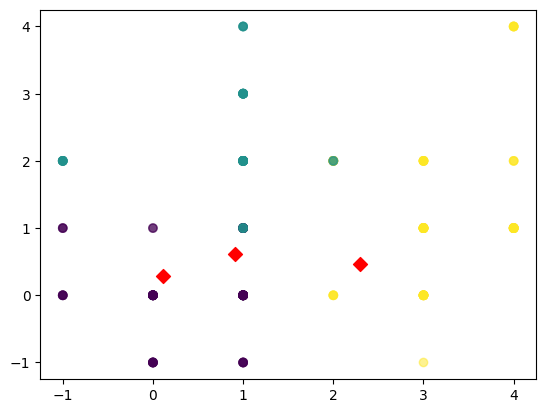

In [29]:
xs = X_test.iloc[:,0]
ys = X_test.iloc[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:, 1]
centroids_y = centroids[:, 2]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50, c='red')

# Show the plot
plt.show()

Silhouette analysis for different numbers of clusters (n_clusters) in order to determine the optimal number of clusters for the KMeans clustering algorithm.

For n_clusters = 2 The average silhouette_score is : 0.22424624593488718
For n_clusters = 3 The average silhouette_score is : 0.23952811681148126
For n_clusters = 4 The average silhouette_score is : 0.18398642914393093
For n_clusters = 5 The average silhouette_score is : 0.15838917142080924
For n_clusters = 6 The average silhouette_score is : 0.1518385921057158
For n_clusters = 7 The average silhouette_score is : 0.15658757910595433
For n_clusters = 8 The average silhouette_score is : 0.1838753932494107
For n_clusters = 9 The average silhouette_score is : 0.1944667207773125


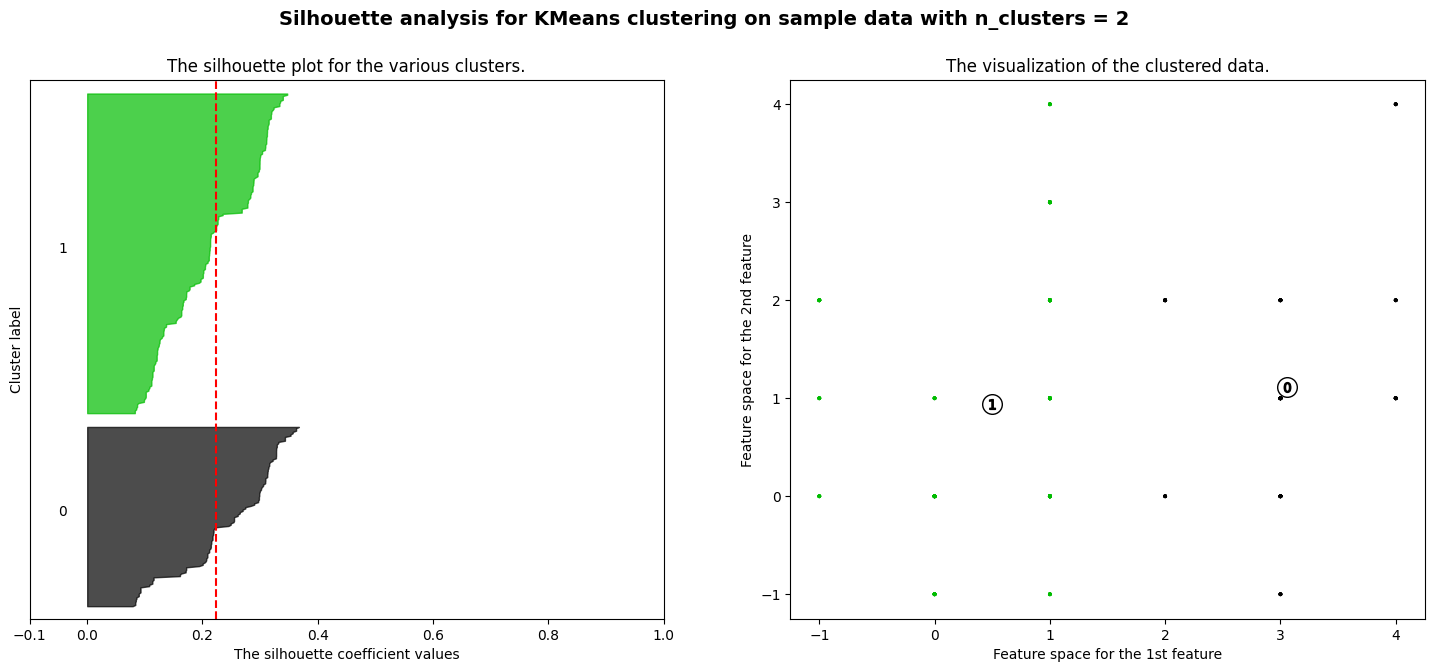

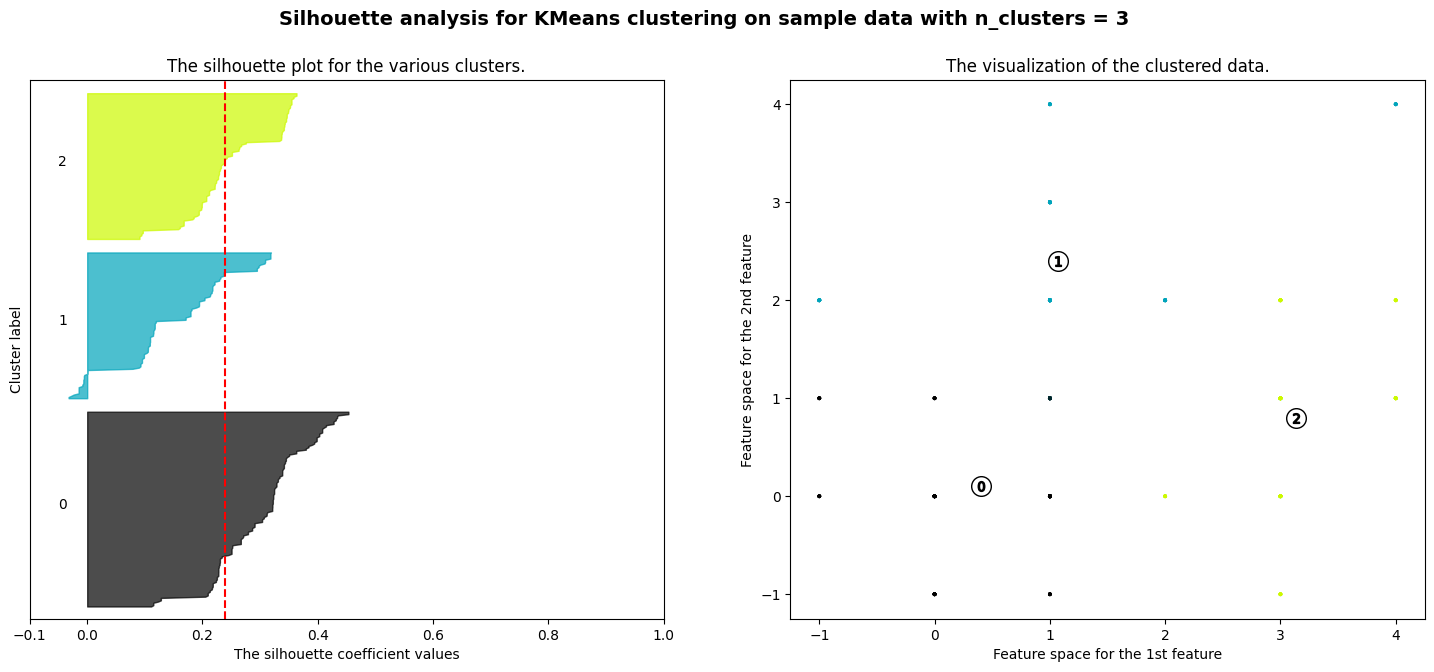

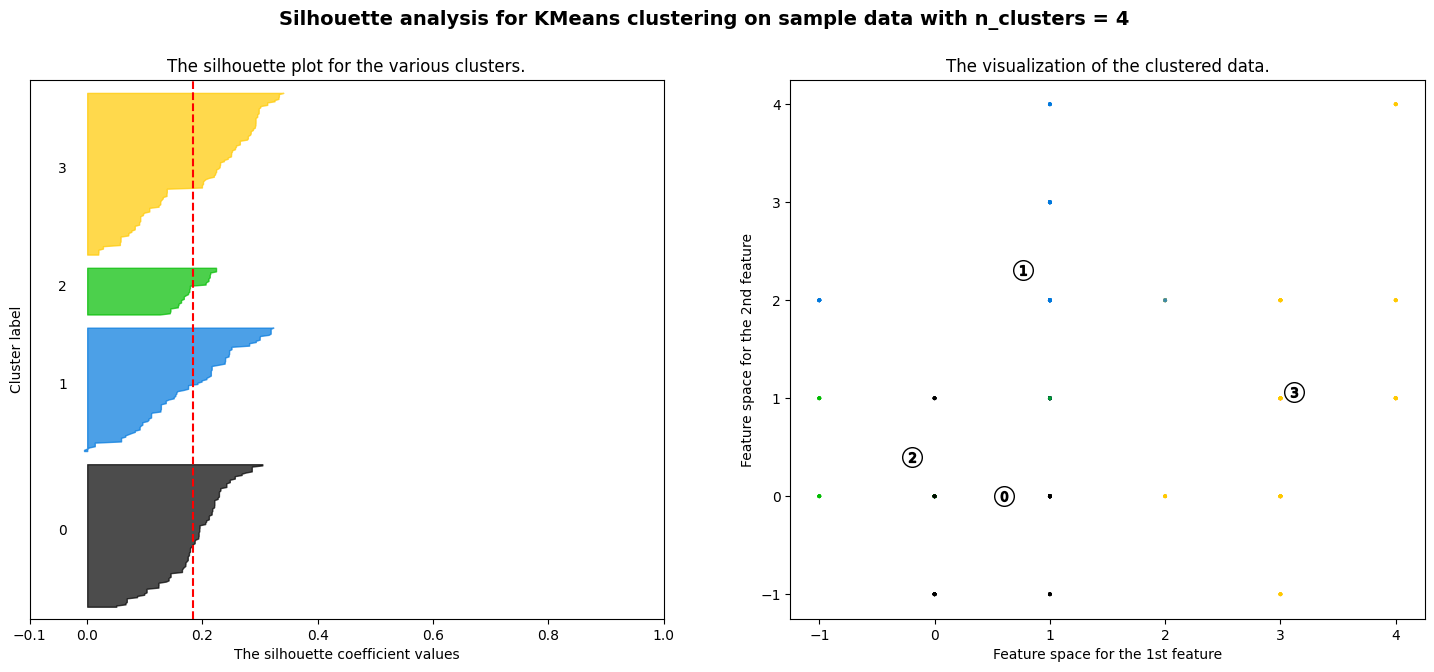

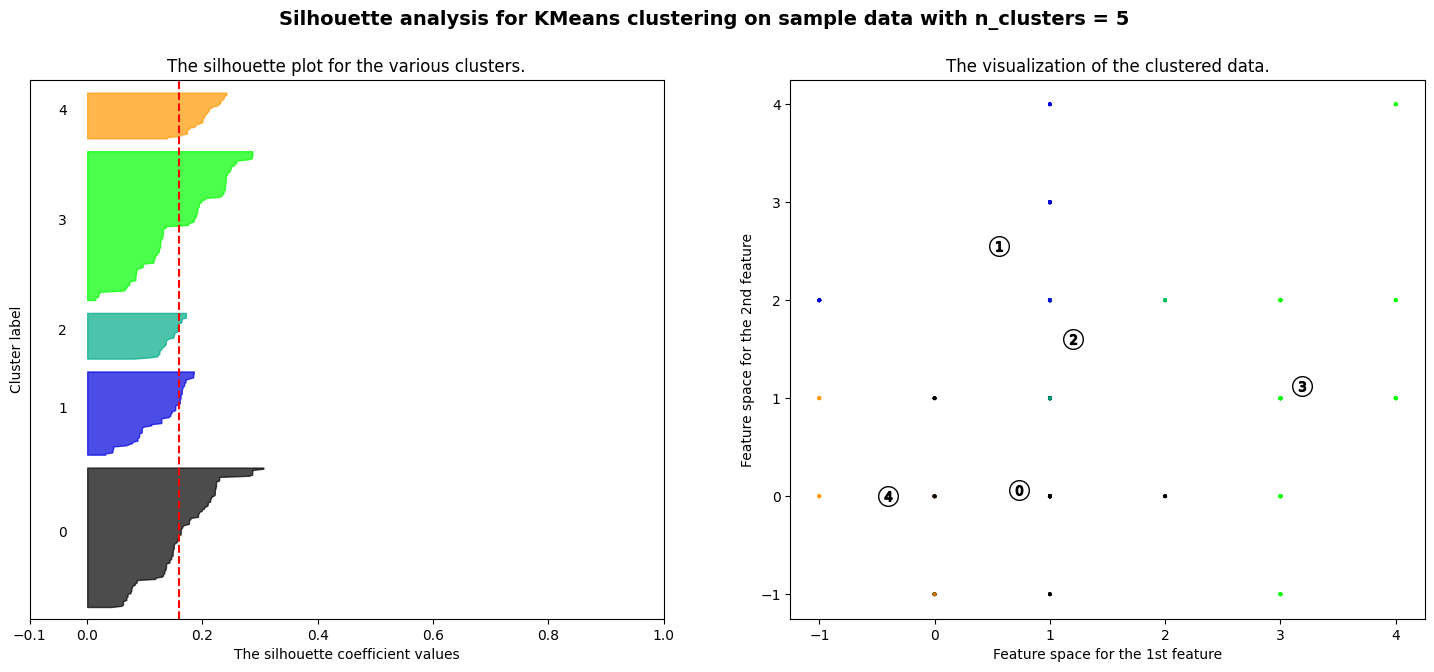

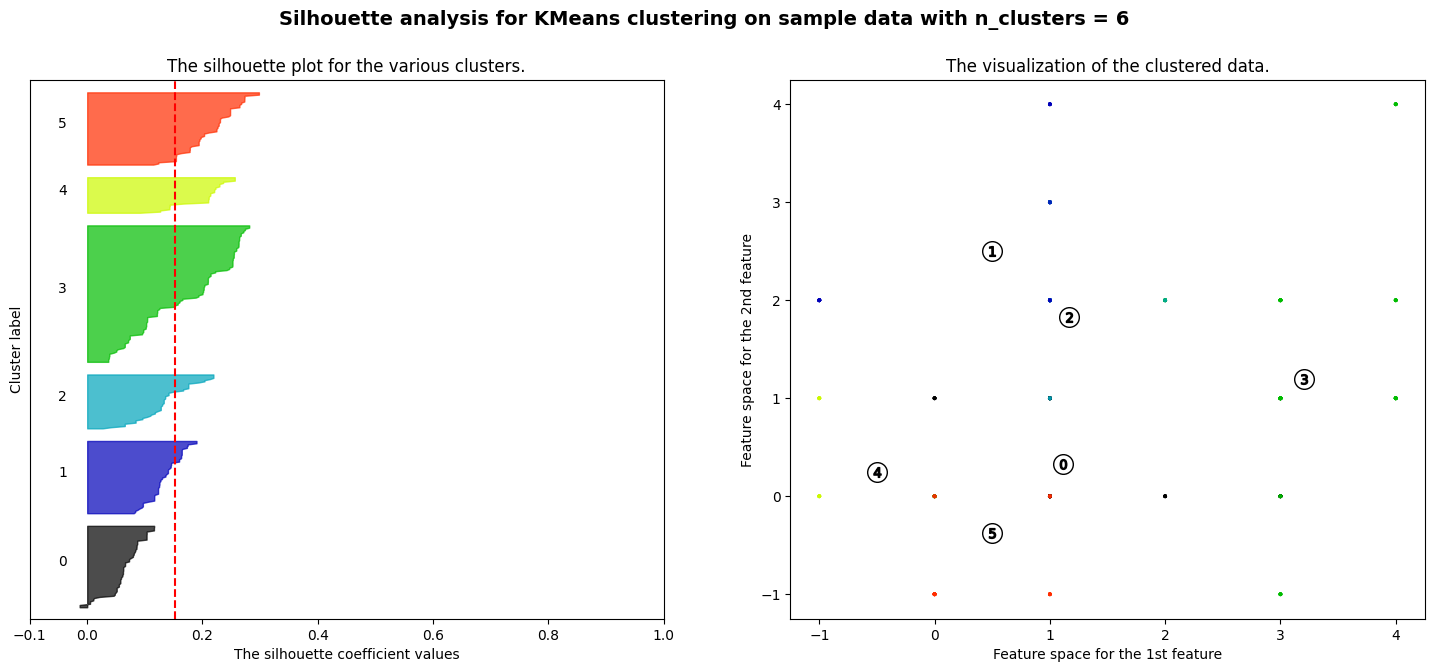

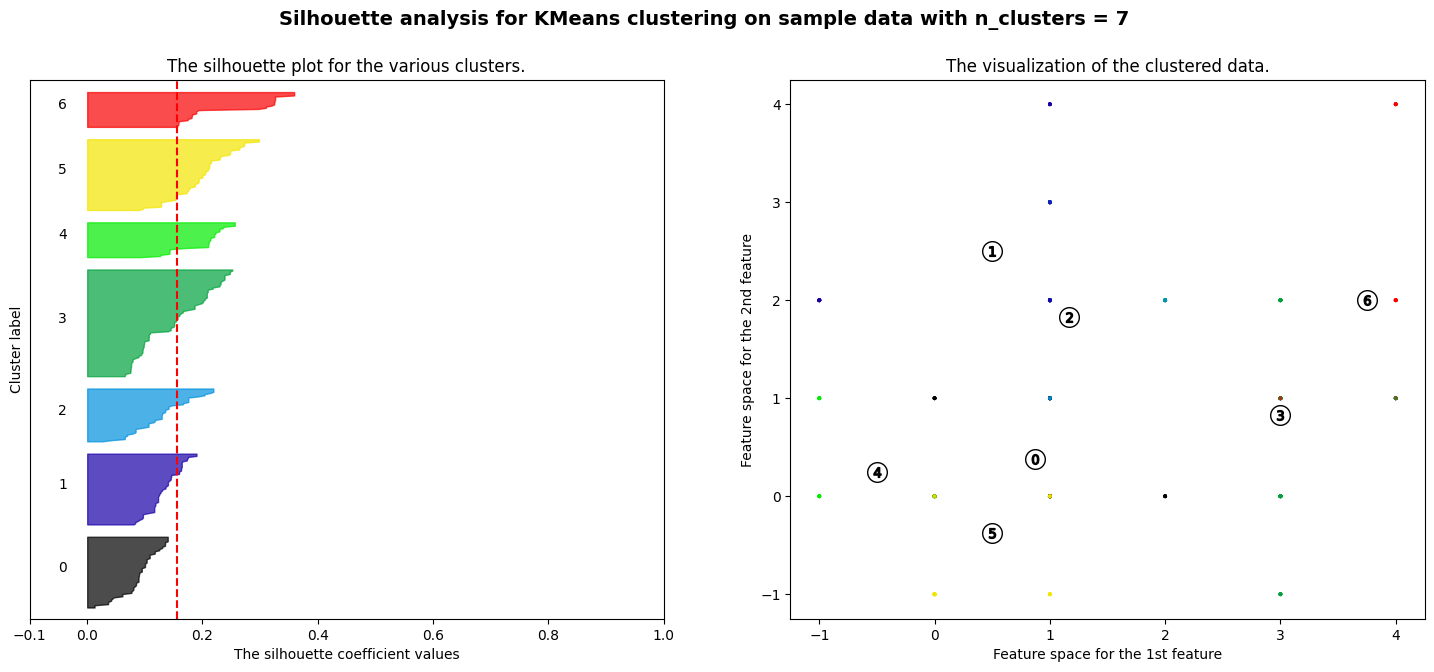

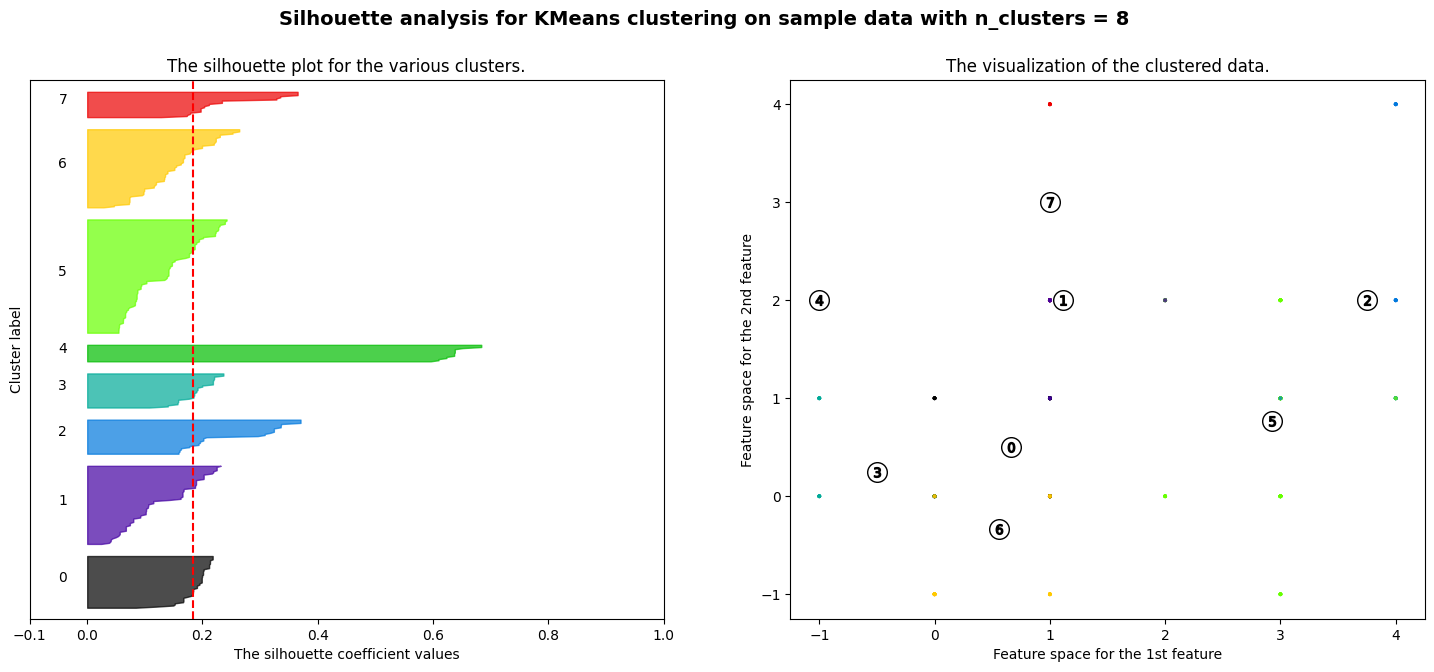

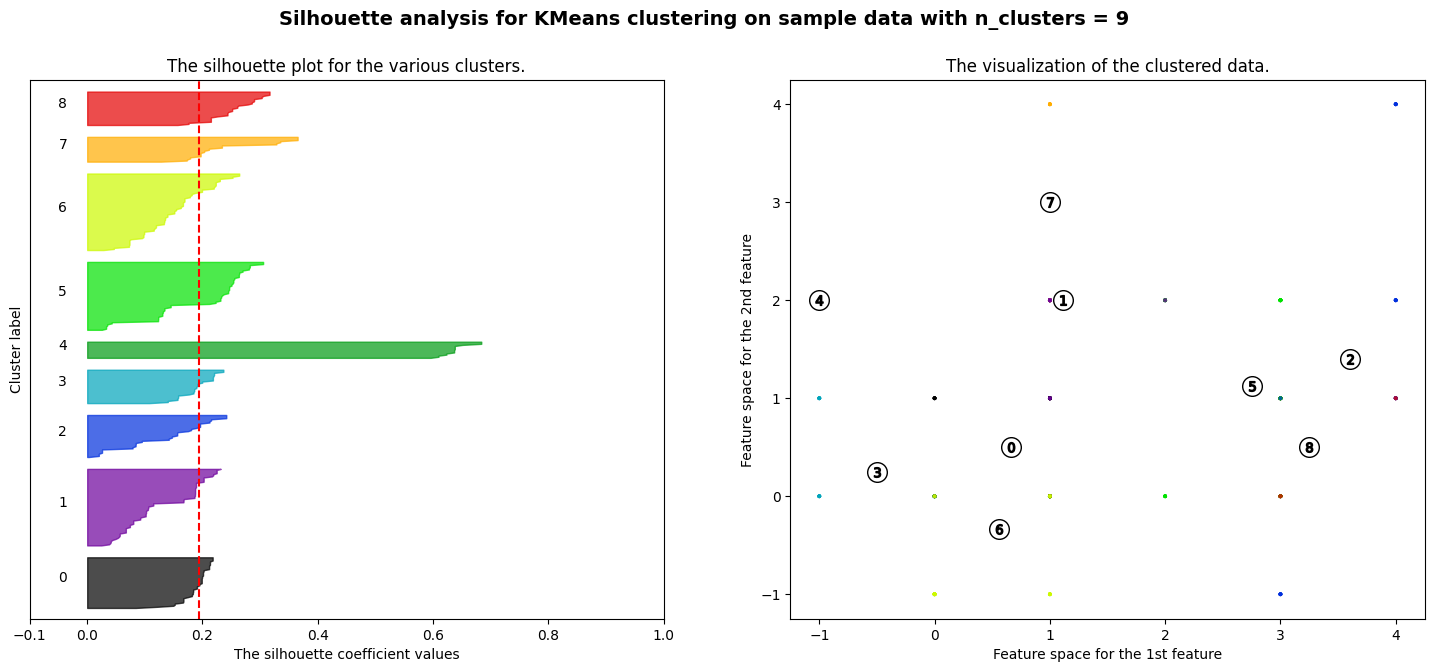

In [30]:
X = encoded_data.values  
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Elbow method

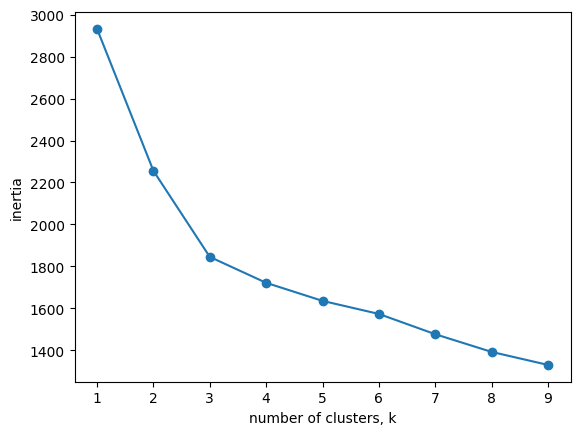

In [31]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init=10)
    
    # Fit model to samples
    model.fit(encoded_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [32]:
inertias

[2931.9749999999995,
 2255.5373263888887,
 1845.3055340557273,
 1721.8288533834584,
 1635.7477272727274,
 1573.4854166666664,
 1476.8420138888891,
 1392.536309523809,
 1330.5003472222224]

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(encoded_data)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(encoded_data)

In [34]:
pipeline = make_pipeline(scaler, model)

In [35]:
pipeline.fit(encoded_data)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=9, n_init=10))])

In [36]:
labels = pipeline.predict(encoded_data)